# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I would define the most profitable item as the one that makes the most money overall, not necessarilty the one that makes the most profit per item. I say this because a more expensive product that makes a larger profit may not be purchased as much as a cheaper product that makes less of a profit, which may be purchased more often and there be more of an incentive to purchase multiples within one purchase. So by this definition, profitability would incorporate the bottle cost, retail price, as well as how many bottles are sold.

In [8]:
import pandas as pd
import os
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#os.chdir('/Users/randap/Desktop/MSDS/Fall25/DS5030-1/understanding_uncertainty/data')
df = pd.read_csv('./data/iowa.csv')

In [9]:
df.dtypes

Invoice/Item Number     object
Date                    object
Store Number             int64
Store Name              object
Zip Code                object
Category Name           object
Vendor Name             object
Item Number              int64
Item Description        object
Bottle Volume (ml)       int64
State Bottle Cost      float64
State Bottle Retail    float64
Bottles Sold             int64
Sale (Dollars)         float64
dtype: object

In [10]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [11]:
# sum total bottles sold for each product
total_sales = df.groupby(['Item Description','State Bottle Cost','State Bottle Retail'])[['Bottles Sold']].sum().reset_index()

# calculating total profit for each product
total_sales['Total Profit'] = (total_sales['State Bottle Retail'] - total_sales['State Bottle Cost']) * total_sales['Bottles Sold']

In [12]:
# ensuring all products are in both dataframes
set(df['Item Description']) == set(total_sales['Item Description'])

True

In [13]:
total_sales.head()

,Item Description,State Bottle Cost,State Bottle Retail,Bottles Sold,Total Profit
0,"""JOSE CUERVO SILVER """"ROLLING STONES""""""",10.50,15.75,8,42.00
1,"""RUMCHATA """"MINICHATAS"""" CREAMER CUPS""",7.00,10.50,144,504.00
2,10 CANE RUM,12.49,18.74,3,18.75
3,10 CANE RUM,12.50,18.75,6,37.50
4,10TH MOUNTAIN CORDIAL,25.00,37.50,2,25.00


<Axes: xlabel='Total Profit', ylabel='Item Description'>

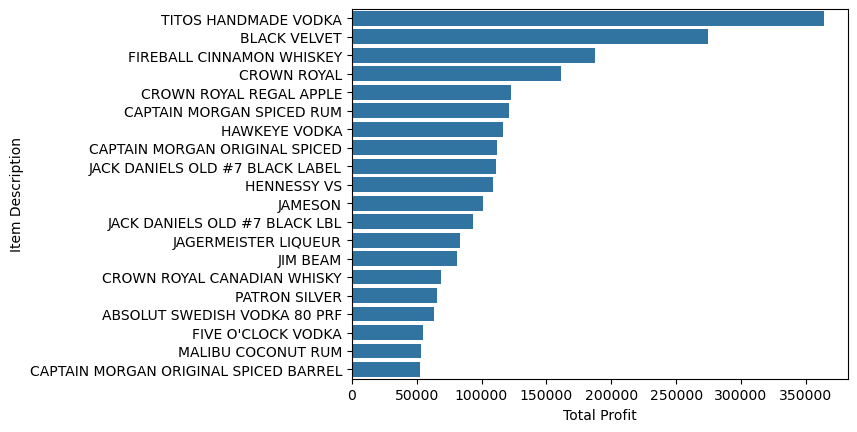

In [14]:
sales = (total_sales.loc[:,['Total Profit','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Total Profit',ascending=False) )
top_profits = sales[:20]
sns.barplot(top_profits['Total Profit'], orient = 'h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [15]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [16]:
x - y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

When you try to subtract the 2 vectors, it raises a ValueError, because they are 2 different lengths.

In [17]:
x.reshape(-1,1)

array([[1],
       [3],
       [5]])

In [18]:
y.reshape(1,-1)

array([[2, 5]])

In [19]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

The result of this computation is a 3 by 2 matrix where each row consists of the element of the reshaped x subracted by the 2 elements of the reshaped y. The first row is the first value of x subracted by both values of y, and so on.

In [20]:
x.reshape(1,-1) - y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

The result of this computation is a 2 by 3 matrix, where each row consists of the values of x subtracted by the corresponding element of y. The first row is all values of  subracted by the first element of y, and the second row is all values of x subrtracted by the second value of y.

In [ ]:
# x.reshape(-1,1) - y.reshape(1,-1)

mat = []
row = []

for i in x:
    for j in y:
        row.append(i- j)
    mat.append(row)
    row = []

mat = np.array(mat)
mat

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [22]:
# x.reshape(1,-1) - y.reshape(-1,1)

mat = []
row = []
for i in y:
    for j in x:
        row.append(j-i)
    mat.append(row)
    row = []

mat = np.array(mat)
mat

array([[-1,  1,  3],
       [-4, -2,  0]])

In [6]:
print(y)
print(y.reshape(1,-1))
print(y.reshape(-1,1))

[2 5]
[[2 5]]
[[2]
 [5]]


x.reshape(1,-1) nests the whole list of values, x, inside another list, making a row vector. x.reshape(-1,1) takes each value within x, makes it into its own list, and nests all of the individual value lists into one big list, making a column vector.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

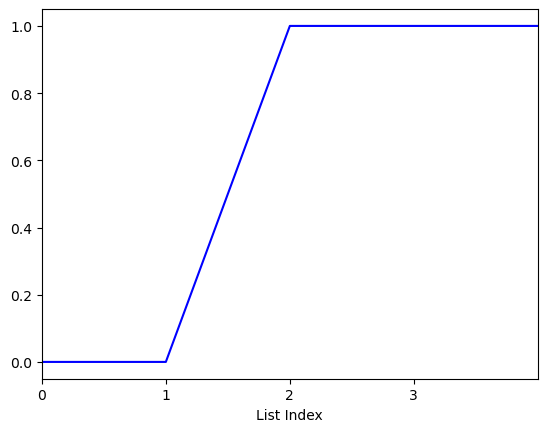

In [139]:
# x = 3

data = np.linspace(0, 10, 5, dtype=int)

def indicator_list(data,thresh):
    return [int(z >= thresh) for z in data]


plt.plot(indicator_list(data,3), color='blue')
plt.xlim(0,4)
plt.xticks([0,1,2,3])
plt.xlabel('List Index')
plt.show()

In [135]:
data

array([ 0,  2,  5,  7, 10])

In [126]:
indicator_list(data,3)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

$ 1- \mathbb{I}\{ x \le z \}$ is equivalent to $\mathbb{I}\{ x > z \}$ because since the indicator function can only take on the values 0 and 1, when applied to a set of data, the values come out to be a proportion of 0's to 1's. For example, if there are 80 data points and 20 of them are less than or equal to the threshold of 5, that means that the other 60 are more than 5. So the proportion of x $\le$ 5 ,$\mathbb{I}\{ x \le z \}$, is 20 / 80 = 0.25, meaning that the proportion of x $>$ 5 is 60 / 80 = 0.75, which is equivalent to 1 - the other proportion (1 - 0.25 = 0.75).

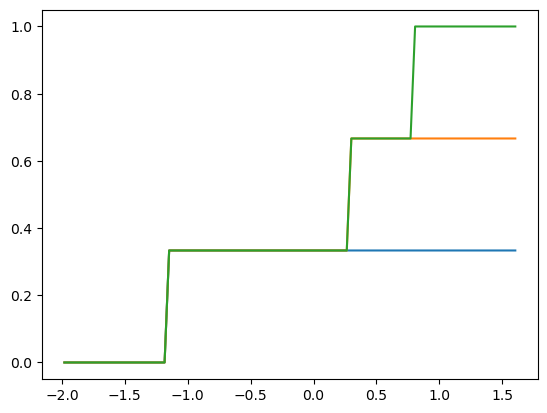

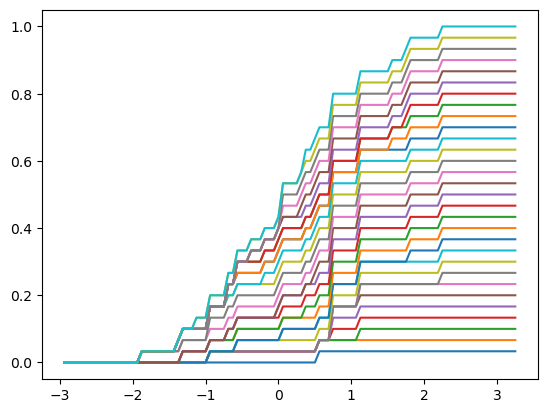

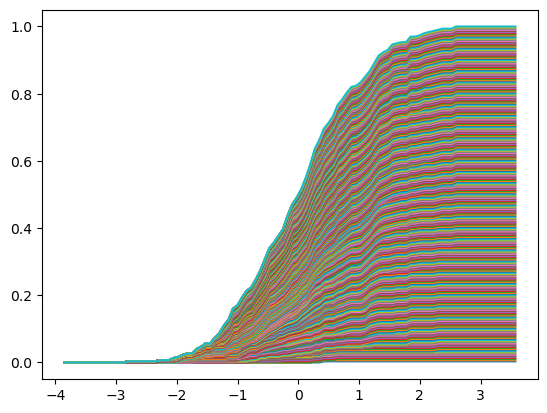

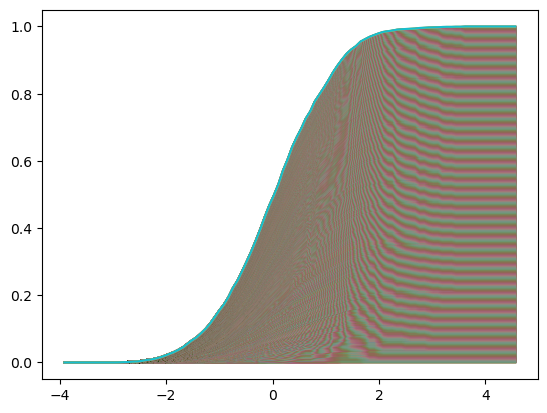

In [ ]:
rng = np.random.default_rng(100)

def indicator(x,grid):
    return x <= grid

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)

    grid = np.linspace(X.min()-X.std(), X.max()+X.std(), 100) 
    ecdf = 0*grid.copy()

    # ECDF plot goes here:
    for i in range(len(X)):
        F_i = indicator(X[i],grid)
        
        ecdf += F_i
        ecdf1 = ecdf/len(X)
        sns.lineplot(x=grid, y=ecdf1)
    plt.show()    

The ECDF plot becomes smoother and nicer looking as the sample size N increases, and the graph gets closer to a normal distribution ECDF graph.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [99]:
def quantile(data, quantile):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    # (1-g)*y[j] + g*y[j+1] 
    # j = (q*n + m - 1) // 1
    # g = (q*n + m - 1) % 1 from numpy documentation

    j = int((quantile*n + (1-quantile) - 1) // 1)
    g = int((quantile*n + (1-quantile) - 1) % 1)

    return (1-g)*sorted_data[j] + g*sorted_data[j+1]


def iqr_whiskers(data):
    low = quantile(data,0.25)
    high = quantile(data,0.75)
    iqr = high - low
    low_whisker, high_whisker = low-(1.5*iqr), high+(1.5*iqr)
    return iqr, low_whisker, high_whisker

def five_num_sum(data):
    sorted_data = sorted(data)
    min = sorted_data[0]
    max = sorted_data[-1]

    if len(sorted_data) % 2 == 0:
        median = (sorted_data[len(sorted_data)//2 - 1] + sorted_data[len(sorted_data)//2])/2
    else:
        median = sorted_data[len(sorted_data//2)]

    low = quantile(data,0.25)
    high = quantile(data,0.75)

    iqr, low_whisker, high_whisker = iqr_whiskers(data)

    return {'min':min,
            '25%':low,
            'median':median, 
            '75%':high, 
            'max':max, 
            'lower whisker':low_whisker,
            'upper whisker':high_whisker}

def outlier(data):
    iqr, low_whisker, high_whisker = iqr_whiskers(data)

    return [(d < low_whisker) or (d > high_whisker) for d in data]

In [84]:
# Quantile Test 
retail = df['State Bottle Retail']

print('Quantile Function \n',
      'Numpy: ',np.quantile(retail,0.75),'\n',
      'Me: ',quantile(retail,0.75))

Quantile Function 
 Numpy:  19.92 
 Me:  19.92


In [85]:
# IQR Test

print('IQR Function\n',
      'Me: ',iqr_whiskers(retail)[0], '\n',
      'Numpy: ', np.quantile(retail,0.75) - np.quantile(retail,0.25))

IQR Function
 Me:  11.250000000000002 
 Numpy:  11.250000000000002


In [ ]:
# Five Number Summary Test
print('Five Number Summary\n',
      'Df.describe():\n ', retail.describe(),'\n\n',
      'Me:\n', pd.DataFrame.from_dict(five_num_sum(retail),orient='index'))

Five Number Summary
 Df.describe():
  count    159904.000000
mean         16.480350
std          17.099067
min           0.000000
25%           8.670000
50%          12.990000
75%          19.920000
max        3448.260000
Name: State Bottle Retail, dtype: float64 

 Me:
                       0
min               0.000
25%               8.670
median           12.990
75%              19.920
max            3448.260
lower whisker    -8.205
upper whisker    36.795


In [101]:
# Outlier Test
outlier(retail)[:20]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False]

<Axes: ylabel='State Bottle Retail'>

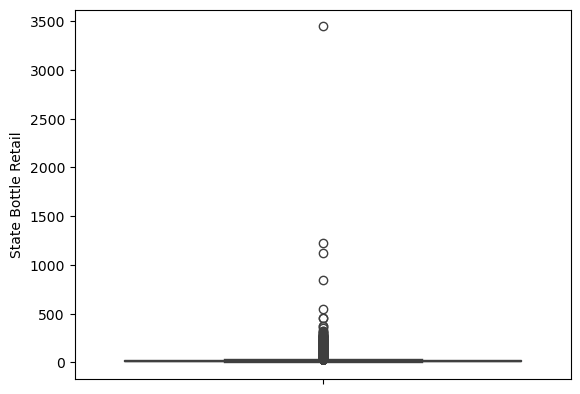

In [102]:
sns.boxplot(retail)

The values calculated by my five number summary function seem to align with sns.boxplot(). The boxplot is very condensed so I can't be sure, but it seems that at the very least, the minimum and the maximum values seem to align with what I calculated

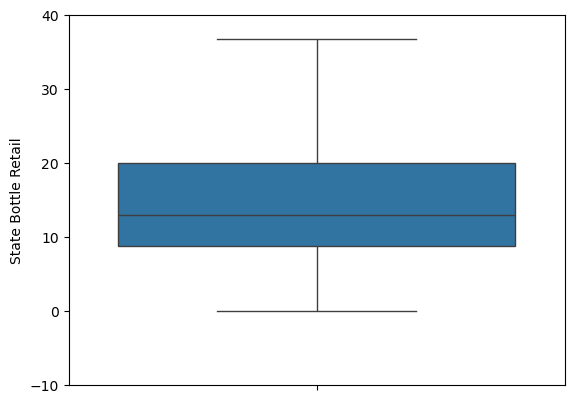

In [80]:
sns.boxplot(retail, showfliers=False)
plt.ylim(-10, 40)
plt.show()

Removing the outliers from the boxplot, the IQR, whiskers, and median align with my calculations.